In [1]:
from pycaret.classification import * 

In [2]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


from tqdm import tqdm
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from IPython.display import set_matplotlib_formats

sns.set(style='white', context='notebook', palette='deep')
line_color = ['#FFBF00','#FF7F50','#DE3163','#9FE2BF','#40E0D0','#6495ED','#117A65','#2471A3','#CCCCFF','#8E44AD','#CD5C5C' ,'#F08080','#FA8072' ,'#E9967A' ,'#FFA07A']
plt.style.use('fivethirtyeight')
plt.style.use("seaborn-whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
print(plt.rcParams['font.family'])
%matplotlib inline

['Malgun Gothic']


# 데이터 불러오기

In [3]:
data=pd.read_csv('산불_이동평균+평균+윈도우+정규화.csv',encoding='cp949',index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 0 to 10019
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               10020 non-null  object 
 1   발생지역             10020 non-null  object 
 2   주소               10020 non-null  object 
 3   경도               10020 non-null  float64
 4   위도               10020 non-null  float64
 5   피해면적             10020 non-null  float64
 6   상대습도             10020 non-null  float64
 7   상대습도_1days_prev  10018 non-null  float64
 8   상대습도_2days_prev  10018 non-null  float64
 9   상대습도_3days_prev  10018 non-null  float64
 10  상대습도_4days_prev  10018 non-null  float64
 11  실효습도             10018 non-null  float64
 12  지점_asos          9746 non-null   float64
 13  거리_asos          9746 non-null   float64
 14  기온               10020 non-null  float64
 15  강수량              10020 non-null  float64
 16  풍속               10020 non-null  float64
 17  기온_1days_pre

In [5]:
data['발생지역'].unique()

array(['제주', '부산', '강원', '경북', '경남', '전남', '대전', '광주', '전북', '대구', '울산',
       '충남', '충북', '서울', '인천', '경기', '세종'], dtype=object)

In [6]:
data.head()

,날짜,발생지역,주소,경도,위도,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,지점_asos,거리_asos,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,지점_aws,거리_aws,계절,month
0,2001-01-01,제주,제주특별자치도 서귀포시 성산읍 성산리,126.932596,33.467104,0.30,0.000000,NaN,NaN,NaN,NaN,NaN,187.0,10.158655,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,725.0,6.516786,그외,1
1,2001-01-01,부산,부산광역시 부산진구 당감동,129.024863,35.168081,0.60,-0.938506,-0.379302,-0.190147,-0.317620,-0.449583,-0.453810,159.0,7.077494,-0.935255,0.0,1.024713,-0.756145,-0.746084,-0.810105,-0.981593,-0.054272,-0.223607,-0.143633,0.203011,938.0,1.139281,그외,1
2,2001-01-01,부산,부산광역시 강서구 화전동,128.872307,35.104051,0.17,-0.973385,-0.374885,-0.379547,-0.661330,-0.595412,-0.532898,159.0,14.527346,-1.053494,0.0,-1.250807,-0.880494,-0.825978,-0.933415,-1.051660,0.069932,-0.242536,0.565193,-0.169856,904.0,9.401205,그외,1
3,2001-01-03,강원,강원도 홍천군 홍천읍 상오안리,127.814492,37.640889,0.20,-0.866272,0.285529,0.768986,-0.397112,-0.476180,-0.645593,212.0,7.497593,-1.829392,0.0,1.842347,-1.403813,-1.668671,-1.183296,-1.119720,1.533498,-0.290254,-0.239765,-0.244334,558.0,11.207163,그외,1
4,2001-01-04,경북,경상북도 영천시 서산동,128.892471,35.979027,0.50,-0.268204,-0.063850,0.018506,-0.271297,-0.393985,-0.046472,281.0,5.305726,-1.776622,0.0,0.395992,-1.482017,-0.866910,-1.336523,-1.239940,0.000000,0.000000,-0.221875,-0.170014,840.0,10.195594,그외,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 0 to 10019
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               10020 non-null  object 
 1   발생지역             10020 non-null  object 
 2   주소               10020 non-null  object 
 3   경도               10020 non-null  float64
 4   위도               10020 non-null  float64
 5   피해면적             10020 non-null  float64
 6   상대습도             10020 non-null  float64
 7   상대습도_1days_prev  10018 non-null  float64
 8   상대습도_2days_prev  10018 non-null  float64
 9   상대습도_3days_prev  10018 non-null  float64
 10  상대습도_4days_prev  10018 non-null  float64
 11  실효습도             10018 non-null  float64
 12  지점_asos          9746 non-null   float64
 13  거리_asos          9746 non-null   float64
 14  기온               10020 non-null  float64
 15  강수량              10020 non-null  float64
 16  풍속               10020 non-null  float64
 17  기온_1days_pre

In [8]:
data.drop(['지점_asos','거리_asos','지점_aws','거리_aws'],axis=1,inplace=True)

In [9]:
data['날짜']=pd.to_datetime(data['날짜'])
data[['계절']]=np.nan

In [10]:
for i in range(2001, 2023):
    data.loc[(f"{i}-02-01" <= data['날짜']) & (data['날짜'] <= f"{i}-05-15"), '계절']=data.loc[(f"{i}-02-01" <= data['날짜']) & (data['날짜'] <= f"{i}-05-15"), '계절'].fillna('봄')
    data.loc[(f"{i}-11-01" <= data['날짜']) & (data['날짜'] <= f"{i}-12-15"), '계절']=data.loc[(f"{i}-11-01" <= data['날짜']) & (data['날짜'] <= f"{i}-12-15"), '계절'].fillna('가을')
data[['계절']]=data[['계절']].fillna('그외')

In [11]:
import datetime
data['month'] = data['날짜'].dt.strftime('%m')

In [12]:
data.drop(['주소', '경도', '위도', 'month'],axis=1,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 0 to 10019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   날짜               10020 non-null  datetime64[ns]
 1   발생지역             10020 non-null  object        
 2   피해면적             10020 non-null  float64       
 3   상대습도             10020 non-null  float64       
 4   상대습도_1days_prev  10018 non-null  float64       
 5   상대습도_2days_prev  10018 non-null  float64       
 6   상대습도_3days_prev  10018 non-null  float64       
 7   상대습도_4days_prev  10018 non-null  float64       
 8   실효습도             10018 non-null  float64       
 9   기온               10020 non-null  float64       
 10  강수량              10020 non-null  float64       
 11  풍속               10020 non-null  float64       
 12  기온_1days_prev    10020 non-null  float64       
 13  기온_2days_prev    10020 non-null  float64       
 14  기온_3days_prev    10020 non-null  float

In [14]:
data=data.dropna(axis=0)

In [15]:
data=data.reset_index(drop=True)

In [16]:
data['계절'].value_counts()

봄     6785
그외    2547
가을     686
Name: 계절, dtype: int64

In [ ]:
data[]

In [17]:
data.describe()

,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev
count,10018.000000,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,10018.000000,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04,1.001800e+04
mean,4.315785,-1.297070e-16,-1.259391e-16,4.308902e-16,1.414432e-16,-1.920892e-16,-1.500541e-16,-9.173913e-17,0.258927,5.673020e-17,-1.203536e-17,4.656775e-17,-7.694428e-17,-5.762787e-19,6.605040e-18,5.504292e-17,3.540789e-17,8.466864e-17
std,171.650810,9.988513e-01,9.988513e-01,9.988513e-01,9.988513e-01,9.988513e-01,9.988513e-01,9.988513e-01,2.126212,9.988513e-01,9.988513e-01,9.988513e-01,9.988513e-01,9.988513e-01,8.070890e-01,9.177517e-01,9.544900e-01,9.673207e-01
min,0.000000,-3.260737e+00,-3.304174e+00,-3.482654e+00,-2.878168e+00,-2.959425e+00,-2.885949e+00,-2.893160e+00,0.000000,-3.425846e+00,-3.073903e+00,-3.079995e+00,-3.243339e+00,-3.189274e+00,-1.000000e+00,-8.122874e-01,-1.034224e+00,-1.414214e+00
25%,0.030000,-7.497175e-01,-7.319599e-01,-7.370880e-01,-7.480315e-01,-7.446067e-01,-7.440707e-01,-7.353717e-01,0.000000,-7.051215e-01,-7.449330e-01,-7.424553e-01,-7.401624e-01,-7.393877e-01,-2.236068e-01,-2.668129e-01,-2.933977e-01,-3.289627e-01
50%,0.100000,-6.850911e-02,-5.377023e-02,-6.208014e-02,-7.758919e-02,-7.869761e-02,-6.613227e-02,-2.482680e-02,0.000000,-1.732095e-01,-3.564214e-02,-5.307162e-02,-5.496909e-02,-4.740048e-02,-1.643990e-01,-2.129287e-01,-2.353640e-01,-2.632464e-01
75%,0.400000,6.930077e-01,7.091847e-01,6.986771e-01,6.936762e-01,7.151210e-01,6.829485e-01,7.185708e-01,0.000000,5.549604e-01,7.179692e-01,7.110574e-01,6.988355e-01,7.006214e-01,0.000000e+00,-1.528461e-01,-1.800666e-01,-1.873698e-01
max,16301.980000,3.228450e+00,3.600604e+00,3.443091e+00,3.560091e+00,3.480602e+00,3.485495e+00,3.453796e+00,63.000000,5.959004e+00,3.663141e+00,3.668675e+00,3.671647e+00,3.513427e+00,1.004947e+01,9.541126e+00,8.484153e+00,8.555643e+00


In [18]:
data = pd.get_dummies(data = data, columns = ['계절'], prefix = '계절')

In [19]:
#data['계절'] = data['계절'].map({'봄': 2, '가을': 1, '그외': 0})

In [20]:
#data['계절'].value_counts()

In [21]:
data = data.rename(columns={ data.columns[20]: '가을', data.columns[21]: '여름겨울', data.columns[22]: '봄'})

In [22]:
data.head(2)

,날짜,발생지역,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,가을,여름겨울,봄
0,2001-01-01,부산,0.60,-0.938506,-0.379302,-0.190147,-0.31762,-0.449583,-0.453810,-0.935255,0.0,1.024713,-0.756145,-0.746084,-0.810105,-0.981593,-0.054272,-0.223607,-0.143633,0.203011,0,1,0
1,2001-01-01,부산,0.17,-0.973385,-0.374885,-0.379547,-0.66133,-0.595412,-0.532898,-1.053494,0.0,-1.250807,-0.880494,-0.825978,-0.933415,-1.051660,0.069932,-0.242536,0.565193,-0.169856,0,1,0


In [23]:
data.drop(['발생지역','날짜'],axis=1,inplace=True)

In [24]:
data.columns

Index(['피해면적', '상대습도', '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '가을', '여름겨울',
       '봄'],
      dtype='object')

In [25]:
heatmap_data = data[['피해면적', '상대습도', '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '가을', '여름겨울',
       '봄']]

In [26]:
#heatmap_data = data[['피해면적','상대습도', '기온', '강수량', '풍속', '실효습도','계절']]

<Figure size 2500x2000 with 0 Axes>

<AxesSubplot:>

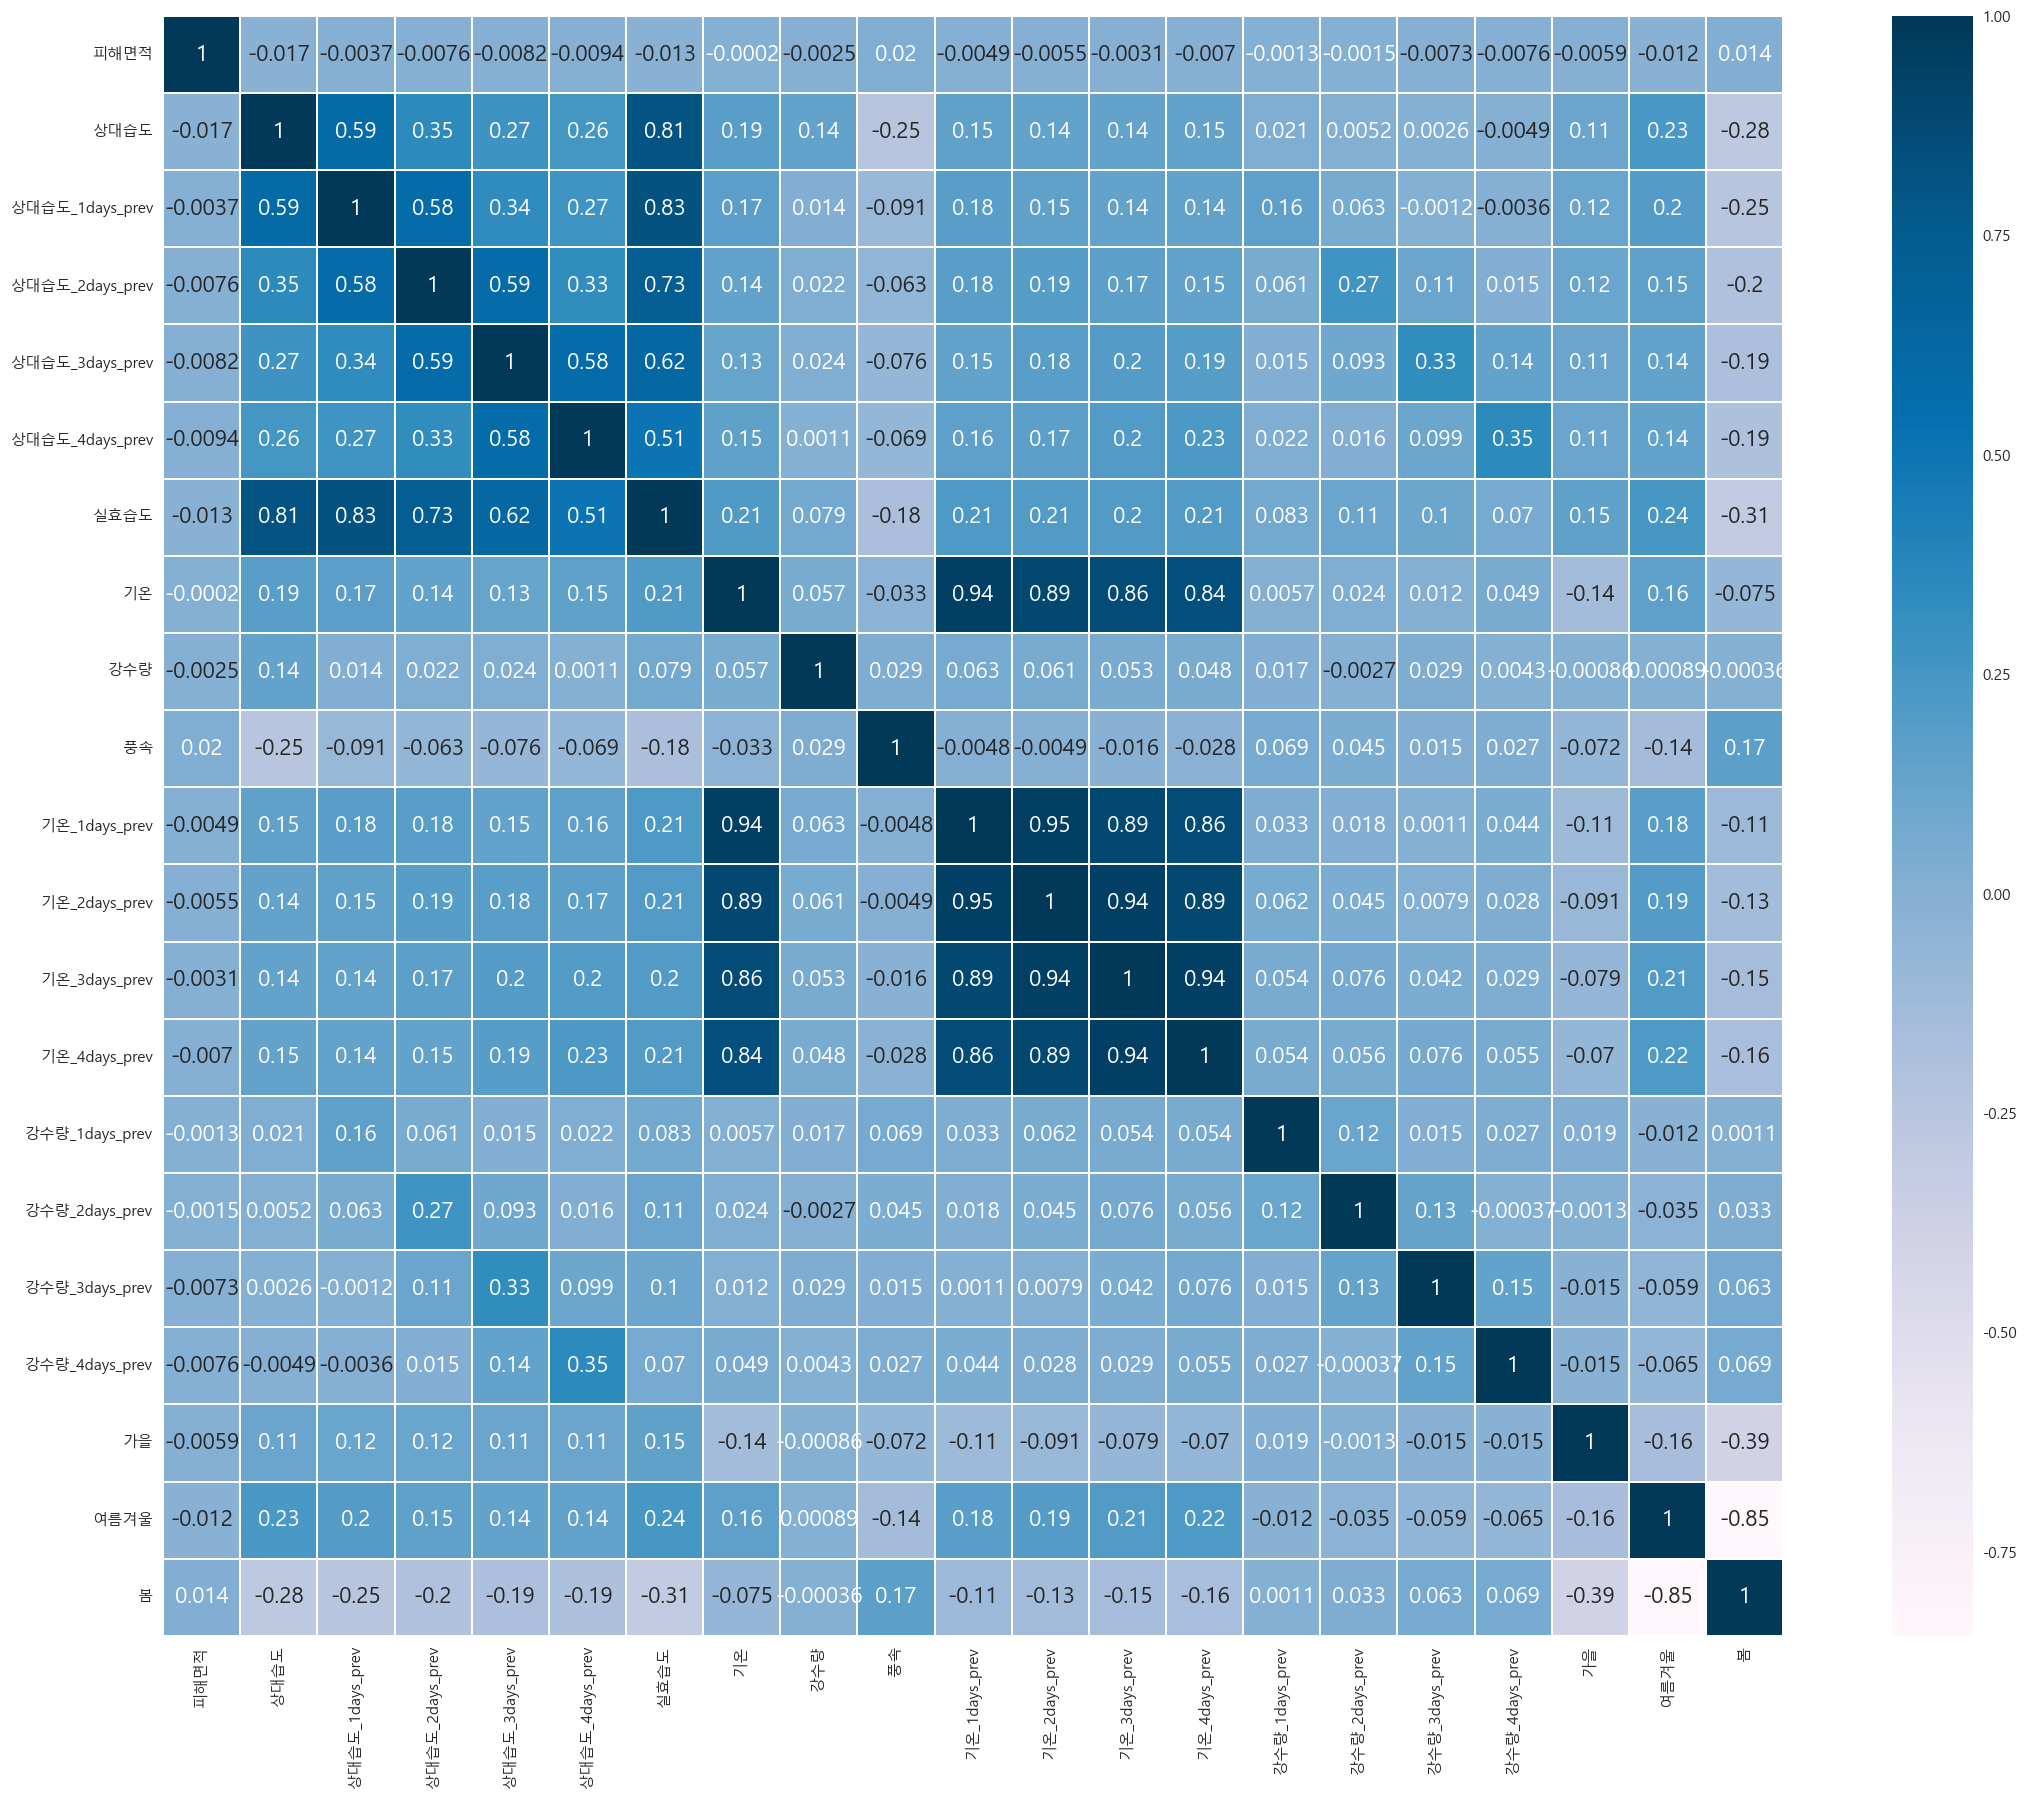

In [27]:
colormap = plt.cm.PuBu
plt.figure(figsize=(25, 20))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [28]:
for i in range(len(data)):
    if data['피해면적'][i]<0.1 :
        data['피해면적'][i]='1'
    elif (data['피해면적'][i]>=0.1) & (data['피해면적'][i]<0.5) :
        data['피해면적'][i]='2'
    elif (data['피해면적'][i]>=0.5) & (data['피해면적'][i]<5) :
        data['피해면적'][i]='3'
    else :
        data['피해면적'][i]='4'

In [29]:
data['피해면적'].value_counts()

2.0    3790
1.0    3779
3.0    2165
4.0     284
Name: 피해면적, dtype: int64

In [30]:
heatmap_data = data[['피해면적', '상대습도', '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '가을', '여름겨울',
       '봄']]

<Figure size 2500x2000 with 0 Axes>

<AxesSubplot:>

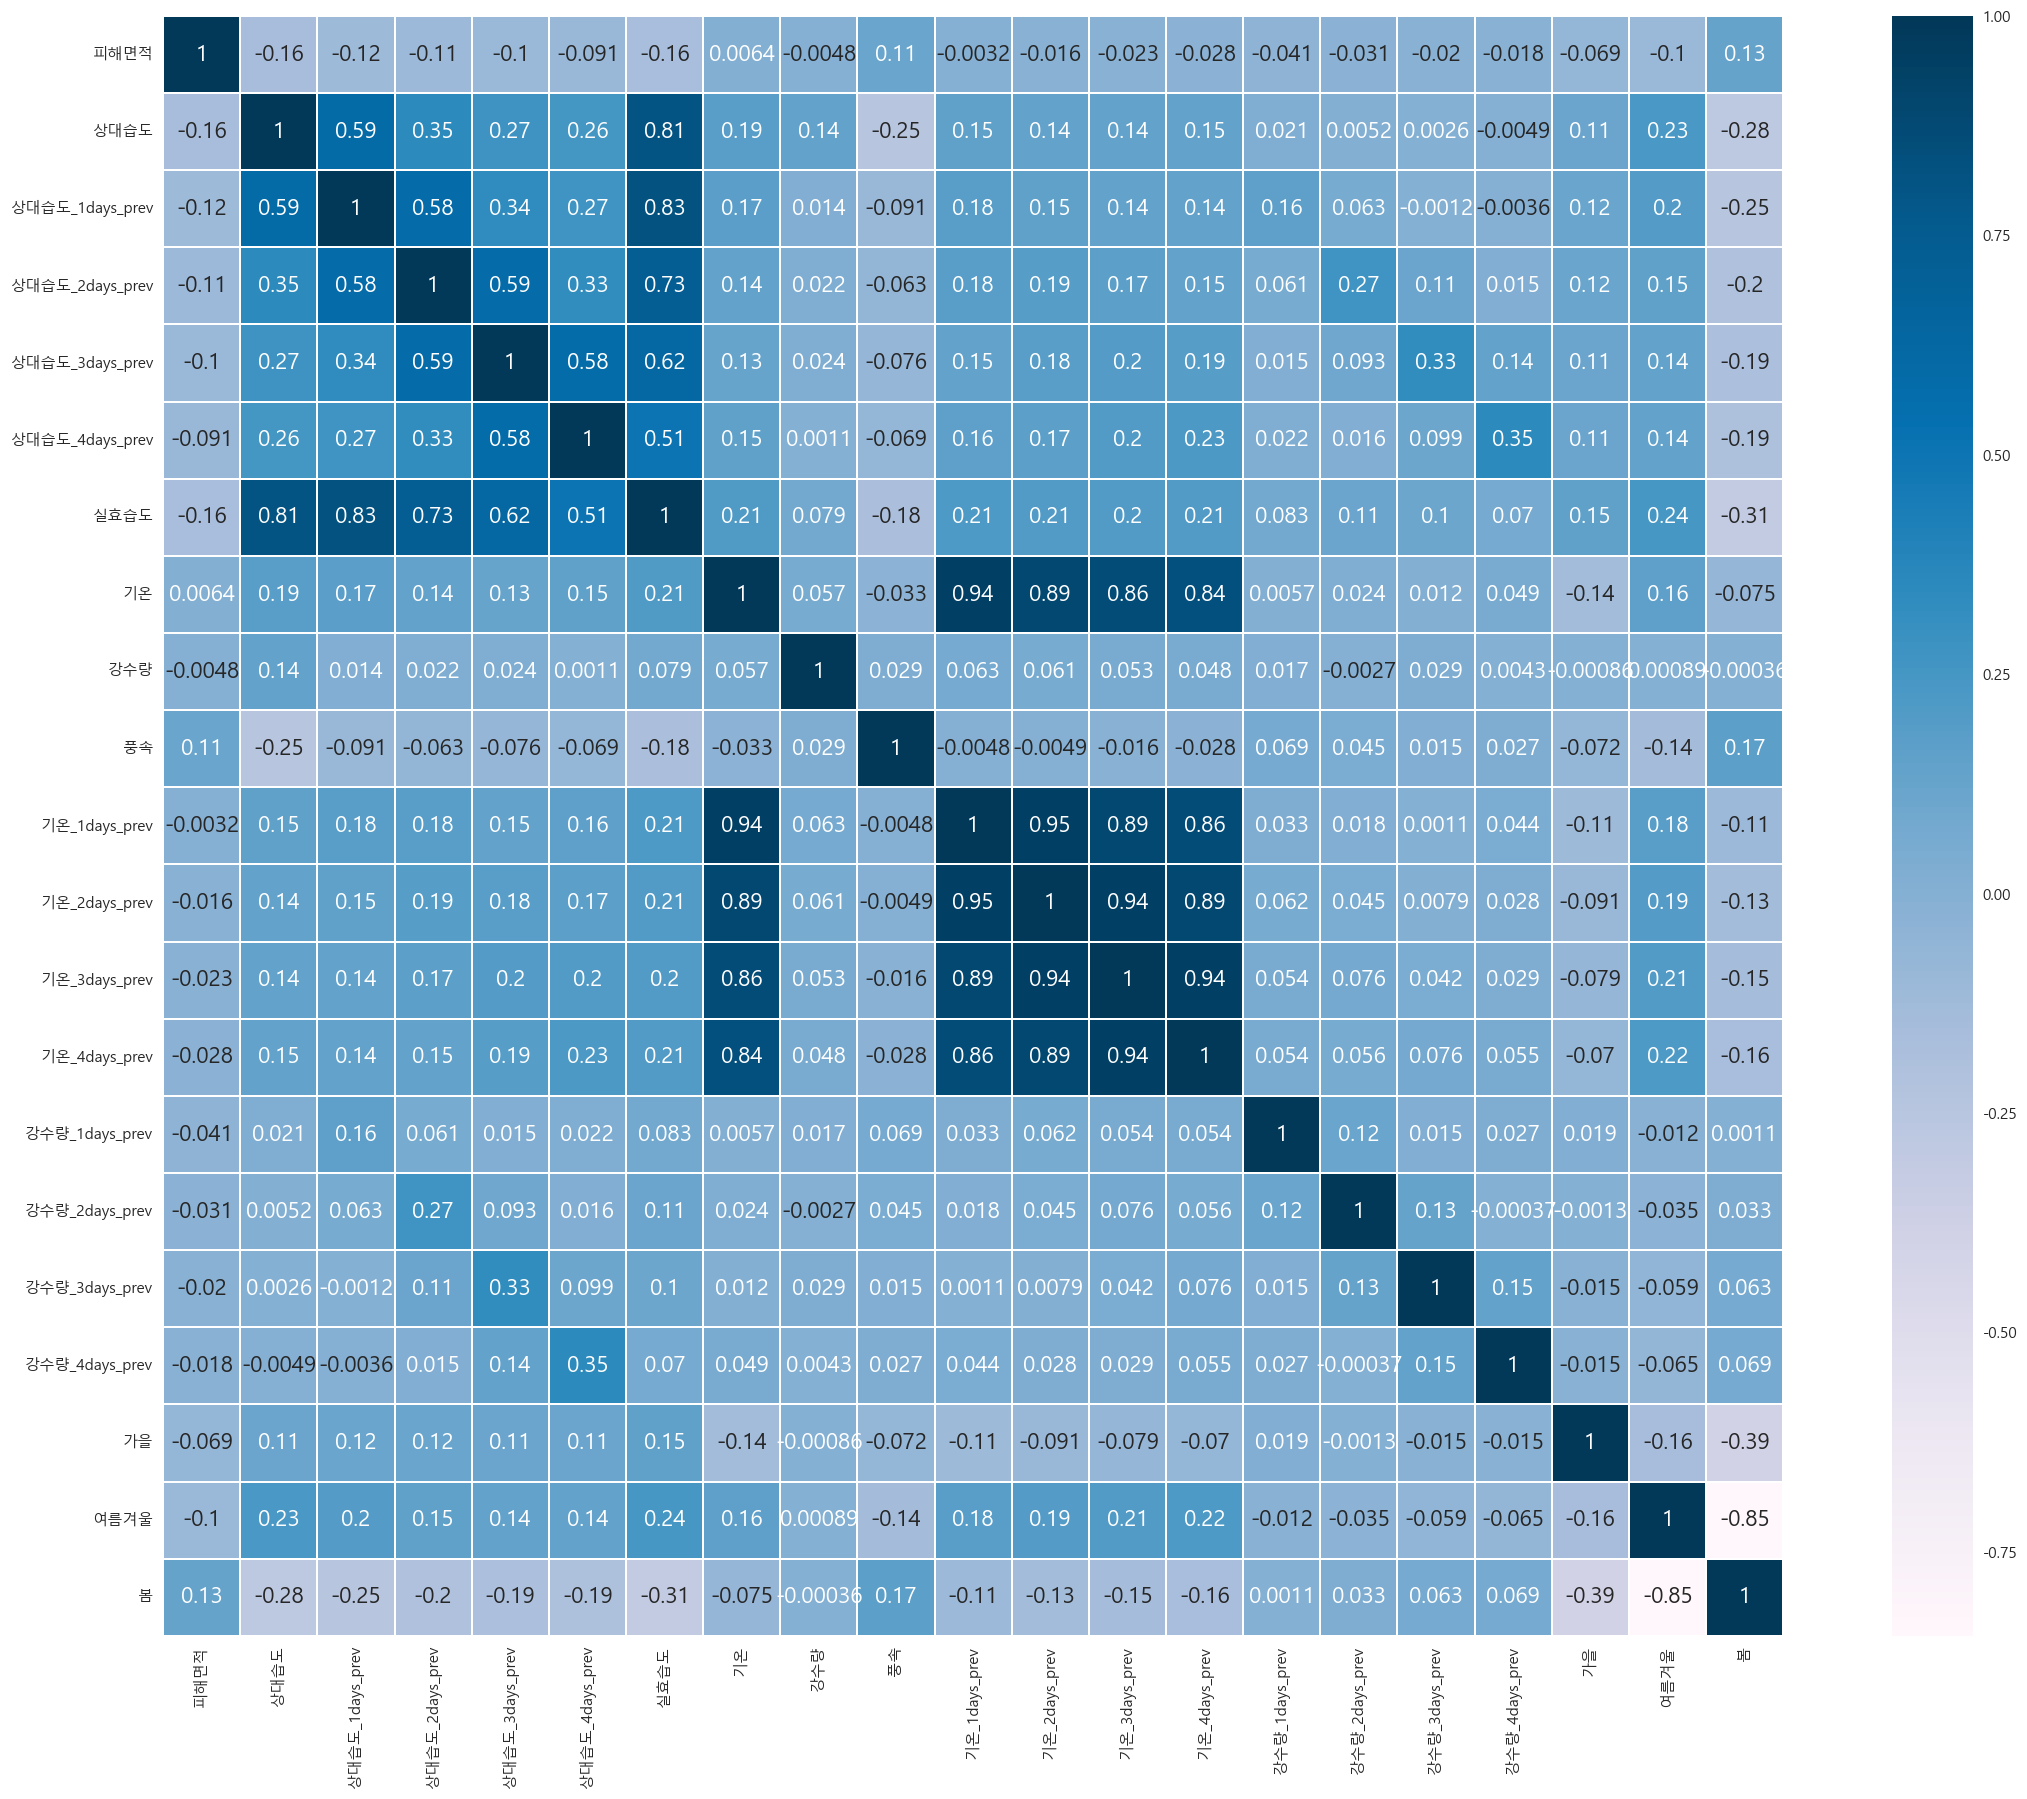

In [31]:
colormap = plt.cm.PuBu
plt.figure(figsize=(25, 20))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

DATA split

In [32]:
data.columns

Index(['피해면적', '상대습도', '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '가을', '여름겨울',
       '봄'],
      dtype='object')

In [33]:
# data.drop(['상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
#          '상대습도_4days_prev'],axis=1,inplace=True)

In [34]:
# data.drop(['강수량'],axis=1,inplace=True)

In [35]:
# data.drop(['기온_1days_prev','기온_2days_prev', '기온_3days_prev', 
#           '기온_4days_prev'],axis=1,inplace=True)

In [36]:
# data.drop(['봄','여름겨울','가을'],axis=1,inplace=True)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train=data

target = train['피해면적'][:len(train)]

print(train.shape,target.shape)

train.drop(['피해면적'],axis=1,inplace=True)

(10018, 21) (10018,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2,stratify=target,random_state=42) 

print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape )

(8014, 20) (2004, 20) (8014,) (2004,)


# RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model1 = RandomForestClassifier(n_estimators=100,random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
prediction = model1.predict(X_test)
print("Accuracy is: ", accuracy_score(prediction, y_test))
acc_RF=accuracy_score(prediction, y_test)

Accuracy is:  0.40818363273453095


In [41]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

Text(0.5, 7.222222222222195, 'Predicted Label')

Text(32.72222222222222, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

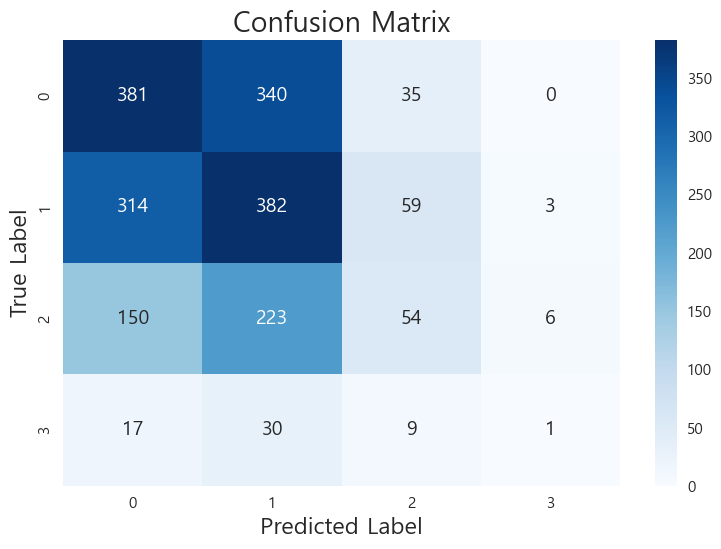

In [42]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

precision = precision_score(y_test, prediction, average=None)
recall = recall_score(y_test, prediction, average=None)

print("Precision:", precision)
print("Recall:", recall)

Precision: [0.44199536 0.39179487 0.34394904 0.1       ]
Recall: [0.50396825 0.50395778 0.12471132 0.01754386]


In [44]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction, average='weighted')
f1

0.38481507203877197

<BarContainer object of 20 artists>

Text(0.5, 0, 'RF Feature Importance')

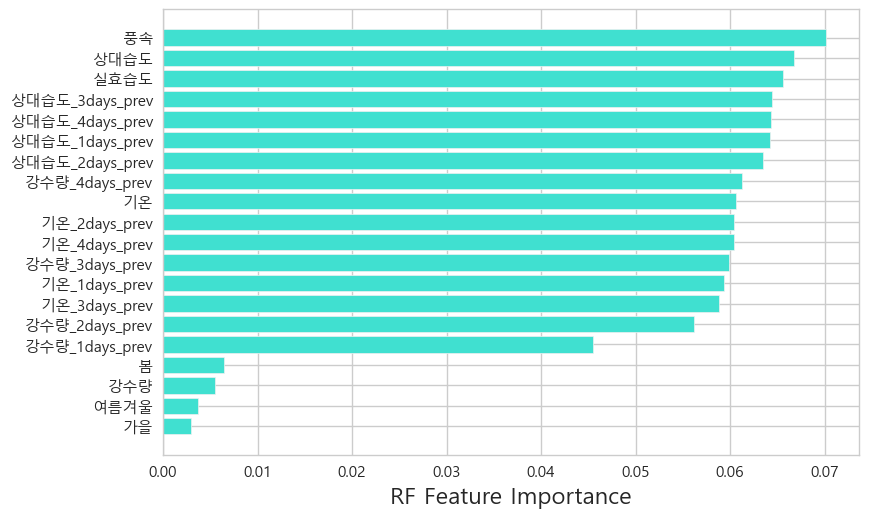

In [45]:
sorted_feature_importance = model1.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance],
        model1.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("RF Feature Importance")

# CatBoost

In [46]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 1.2532345	total: 134ms	remaining: 13.2s
1:	learn: 1.1929617	total: 138ms	remaining: 6.75s
2:	learn: 1.1615993	total: 143ms	remaining: 4.63s
3:	learn: 1.1448469	total: 149ms	remaining: 3.57s
4:	learn: 1.1342850	total: 153ms	remaining: 2.91s
5:	learn: 1.1250880	total: 157ms	remaining: 2.46s
6:	learn: 1.1184102	total: 162ms	remaining: 2.15s
7:	learn: 1.1135721	total: 165ms	remaining: 1.9s
8:	learn: 1.1068041	total: 170ms	remaining: 1.72s
9:	learn: 1.1022831	total: 174ms	remaining: 1.57s
10:	learn: 1.0988096	total: 178ms	remaining: 1.44s
11:	learn: 1.0948350	total: 183ms	remaining: 1.34s
12:	learn: 1.0907031	total: 188ms	remaining: 1.25s
13:	learn: 1.0852484	total: 193ms	remaining: 1.18s
14:	learn: 1.0807865	total: 197ms	remaining: 1.11s
15:	learn: 1.0773447	total: 201ms	remaining: 1.05s
16:	learn: 1.0735525	total: 205ms	remaining: 999ms
17:	learn: 1.0701144	total: 210ms	remaining: 955ms
18:	learn: 1.0648797	total: 216ms	remaining: 921ms
19:	learn: 1.0608

In [47]:
prediction = model.predict(X_test)
print("Accuracy is: ", accuracy_score(prediction, y_test))
acc_RF=accuracy_score(prediction, y_test)

Accuracy is:  0.38223552894211577


<BarContainer object of 20 artists>

Text(0.5, 0, 'CatBoost Feature Importance')

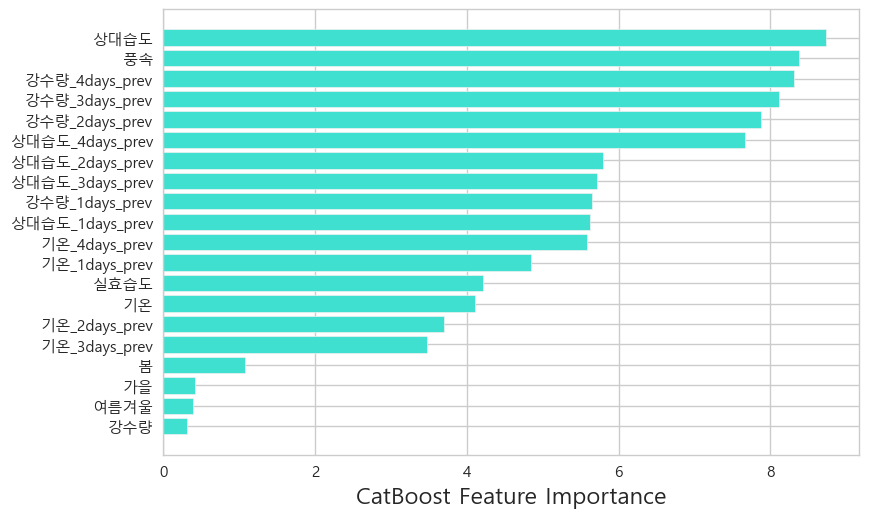

In [48]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance],
        model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [49]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction, average='weighted')
f1

0.36215168546409177

<AxesSubplot:>

Text(0.5, 7.222222222222195, 'Predicted Label')

Text(32.72222222222222, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

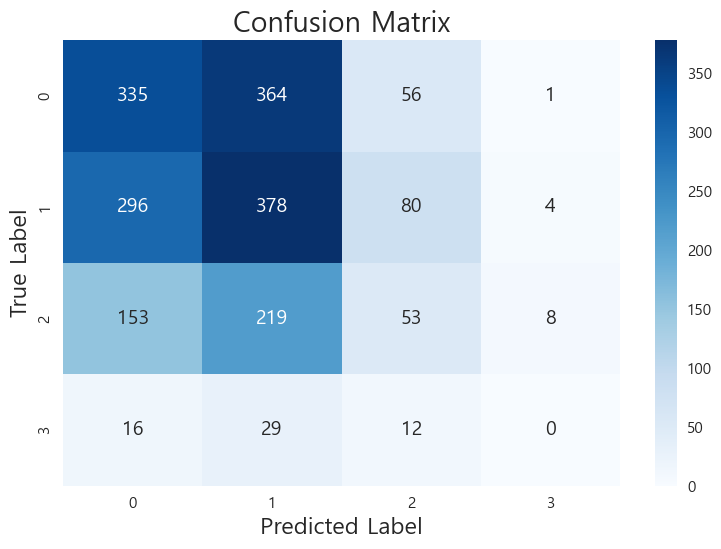

In [50]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [51]:
precision = precision_score(y_test, prediction, average=None)
recall = recall_score(y_test, prediction, average=None)

print("Precision:", precision)
print("Recall:", recall)

Precision: [0.41875    0.38181818 0.26368159 0.        ]
Recall: [0.44312169 0.49868074 0.12240185 0.        ]


.

.